In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
PHENS_CSV = "binary_disease.csv"
VIT_D_CSV = "vit_d_data_participant.csv"
VIT_D_PHEN = "p30890_i0"

In [15]:
phens_df = pd.read_csv(PHENS_CSV)
vit_d_df = pd.read_csv(VIT_D_CSV)
vit_d_df["Vitamin D"] = vit_d_df[VIT_D_PHEN]
vit_d_df = vit_d_df.drop(VIT_D_PHEN,axis=1)
VIT_D_PHEN = "Vitamin D"

In [16]:
df = phens_df.merge(vit_d_df, how='left', on='eid')

In [17]:
df = df.drop("Unnamed: 0",axis=1)


,eid,sex,Graves' disease,Thyroiditis,Type 1 diabetes,Multiple sclerosis,Myasthenia gravis,Asthma,Regional enteritis,Celiac disease,...,p100021_i0,p100021_i1,p100021_i2,p100021_i3,p100021_i4,p130774,p130775,p130776,p130777,Vitamin D
0,5895328,1.0,0,0,0,0,0,0,0,0,...,NaN,NaN,1.43,1.39,2.13,NaN,NaN,NaN,NaN,55.0
1,5764375,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,1.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5503073,1.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.3
3,2563626,1.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
4,4980832,1.0,0,0,0,0,0,0,0,0,...,NaN,0.76,9.45,NaN,1.01,NaN,NaN,NaN,NaN,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333410,2243883,1.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8
333411,3570729,1.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0
333412,1663456,1.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.1
333413,3118989,0.0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.8


In [18]:
phenotypes = []
for col in list(df.columns):
    if col != "sex" and col != "eid" and not col.startswith("p"):
        phenotypes.append(col)

In [19]:
male_df = df[df["sex"] == 1]
female_df = df[df["sex"] == 0]

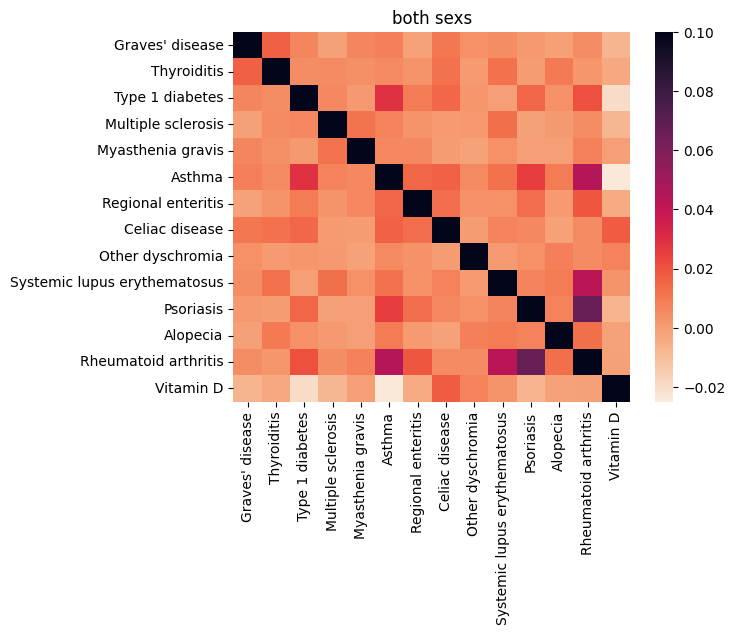

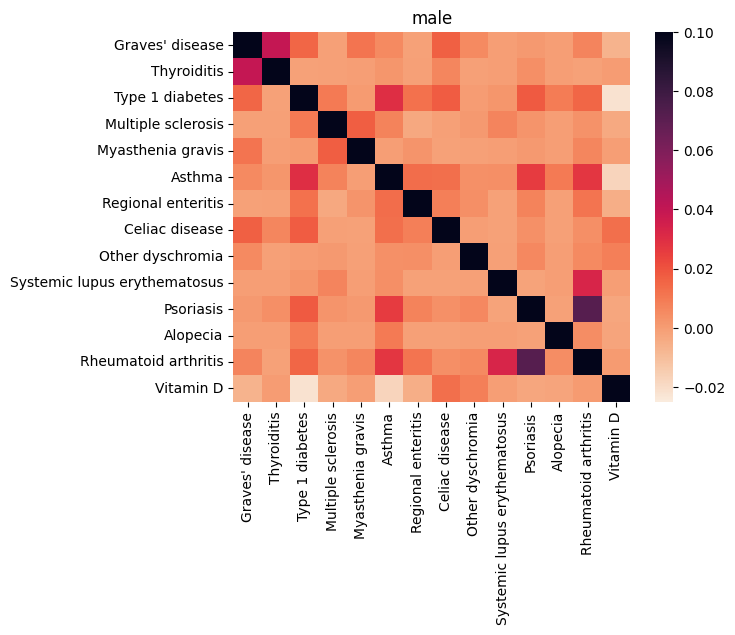

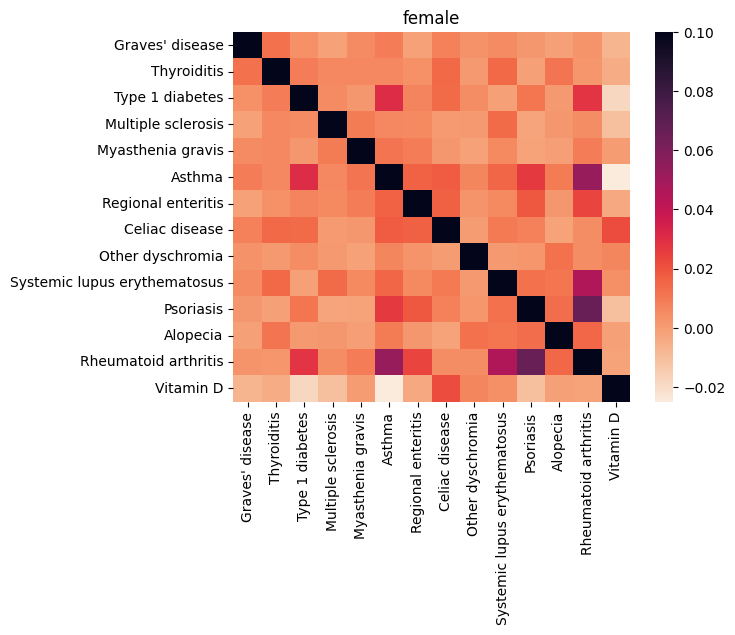

In [23]:
df[phenotypes + [VIT_D_PHEN]].corr()

sns.heatmap( df[phenotypes].corr(),vmin=-0.025, vmax=0.1,cmap = sns.cm.rocket_r
)
plt.title("both sexs")
plt.show()
df[phenotypes + [VIT_D_PHEN]].corr()
sns.heatmap( male_df[phenotypes].corr(),vmin=-0.025, vmax=0.1,cmap = sns.cm.rocket_r
)
plt.title("male")
plt.show()
df[phenotypes + [VIT_D_PHEN]].corr()
sns.heatmap( female_df[phenotypes].corr(),vmin=-0.025, vmax=0.1,cmap = sns.cm.rocket_r
)
plt.title("female")

plt.show()

In [9]:
phens = list(phens_df)[3:]
if "count" in phens:
    phens.remove("count")
phens_df["count"] = phens_df[phens].sum(axis=1)
phens_df_reduced = phens_df[phens_df["count"] > 0]
phens_df_reduced["count"].value_counts()

for phen in phens:
    without_phen = phens[:]
    without_phen.remove(phen)
    phens_df_reduced["sum_without_"+ phen] = phens_df_reduced[without_phen].sum(axis=1)

for phen in phens:
    print(phen)
    phen_specific = phens_df_reduced[phens_df_reduced[phen]==1]
    print(phen_specific["sum_without_"+ phen].value_counts())
    print("")

Graves' disease
0    318
1     85
2     11
Name: sum_without_Graves' disease, dtype: int64

Thyroiditis
0    211
1     64
2      8
Name: sum_without_Thyroiditis, dtype: int64

Type 1 diabetes
0    1941
1     543
2      63
3       6
Name: sum_without_Type 1 diabetes, dtype: int64

Multiple sclerosis
0    1008
1     173
2      21
3       2
Name: sum_without_Multiple sclerosis, dtype: int64

Myasthenia gravis
0    126
1     44
2      4
Name: sum_without_Myasthenia gravis, dtype: int64

Asthma
0    22417
1     1958
2      172
3       12
4        1
Name: sum_without_Asthma, dtype: int64

Regional enteritis
0    1228
1     280
2      47
3       7
4       1
Name: sum_without_Regional enteritis, dtype: int64

Celiac disease
0    1364
1     305
2      41
3       3
4       1
Name: sum_without_Celiac disease, dtype: int64

Other dyschromia
0    642
1    105
2     15
3      2
Name: sum_without_Other dyschromia, dtype: int64

Systemic lupus erythematosus
0    188
1    101
2     21
3      2
Name: su

/cs/labs/michall/roeizucker/fml_virt_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
